# SE-2200E Notebook 5: Another Prediction

Ningsong Shen

March 9, 2021

## Summary

Decision Trees Support Vector Regressions are attempted with the data that is sorted and feature scaled.

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('../clean_data/sample_data.csv').drop_duplicates()
df = df[df["real_departure_time"] > 0]
df = df[df["scheduled_departure_time"] > 0]
# df = df.sort_values(["scheduled_departure_time", "real_departure_time"], ignore_index=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.head()

trip_id  start_date  route_id  stop_sequence  vehicle_id  \
0  1346803    20201104        24             41      3140.0   
1  1346803    20201105        24             41      3177.0   
2  1346803    20201106        24             41      3143.0   
3  1346803    20201109        24             41      3144.0   
4  1346803    20201110        24             41      3178.0   

   scheduled_departure_time  real_departure_time  
0                    2134.0               2169.0  
1                    2134.0               2040.0  
2                    2134.0               2040.0  
3                    2134.0               2040.0  
4                    2134.0               2040.0

In [18]:
df1 = df.sample(5000).sort_values(["scheduled_departure_time", "real_departure_time"], ignore_index=True)
X_disp = df1["scheduled_departure_time"]
X = df1[["trip_id", "start_date",  "stop_sequence", "vehicle_id", "scheduled_departure_time"]]
Y = df1["real_departure_time"].values.reshape(-1, 1)

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(Y)

In [19]:
# We'll train on the entire dataset, then predict individual routes

regressor_1 = DecisionTreeRegressor(max_depth=5)
regressor_1.fit(X, Y)

regressor_2 = svm.SVR(kernel='rbf')
regressor_2.fit(X, Y)

Y_pred_1 = regressor_1.predict(X)
Y_pred_2 = regressor_2.predict(X)

C:\Users\nings\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0, 0.5, 'Actual # of seconds from terminal')

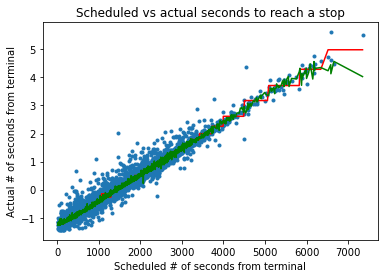

In [20]:
plt.scatter(X_disp, Y, marker=".")
plt.plot(X_disp, Y_pred_1, color='red', label = "decision tree")
plt.plot(X_disp, Y_pred_2, color='green', label = "svr")

plt.title("Scheduled vs actual seconds to reach a stop")
plt.xlabel("Scheduled # of seconds from terminal")
plt.ylabel("Actual # of seconds from terminal")
#plt.xlim([-1, 1])
#plt.ylim([-1, 1])

<ipython-input-24-ad5ed11a286e>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


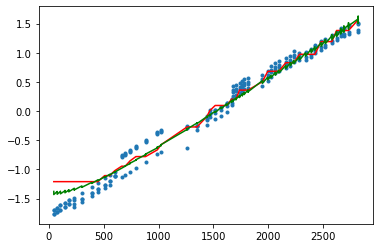

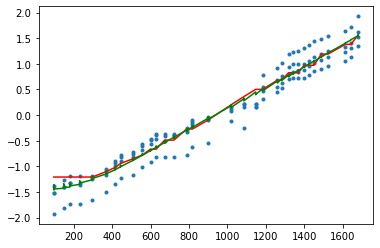

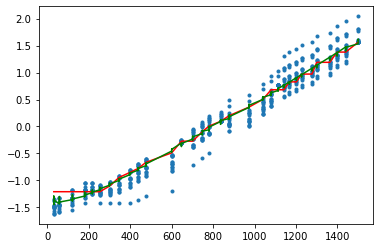

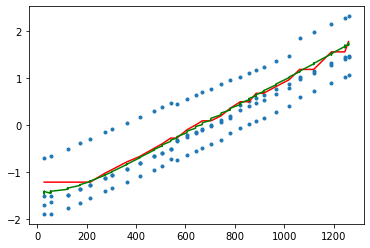

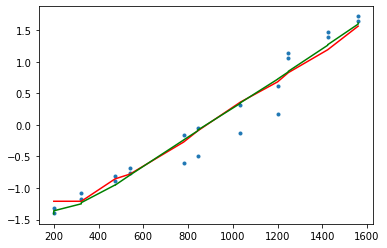

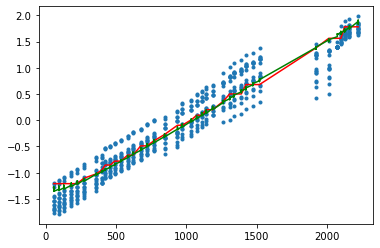

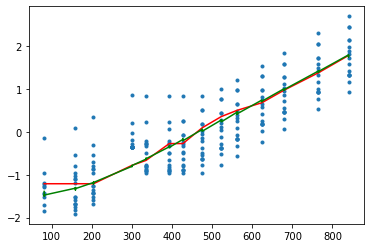

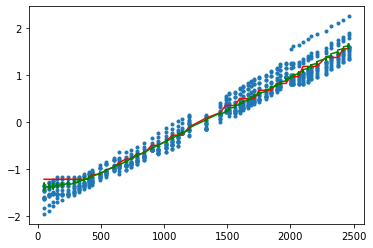

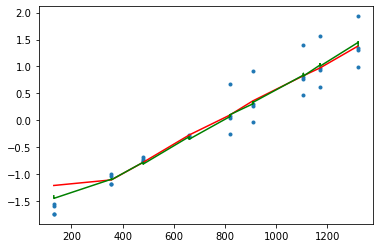

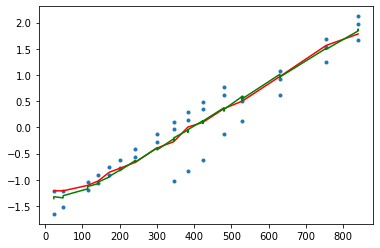

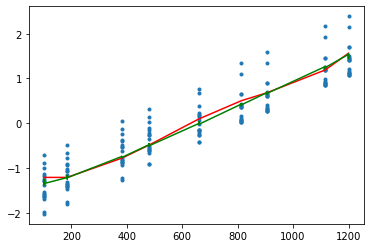

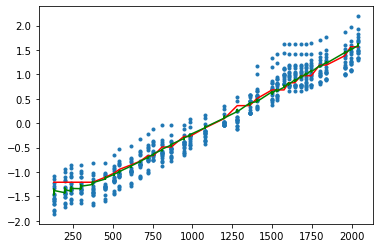

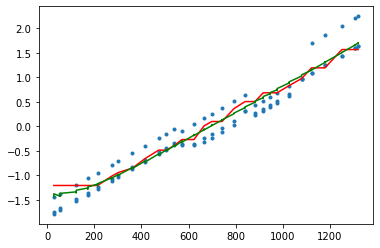

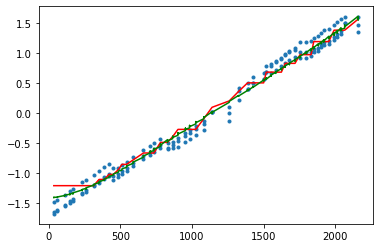

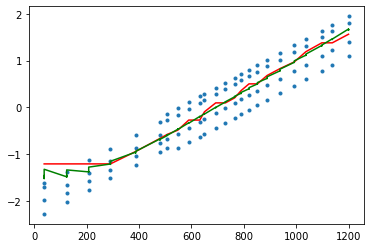

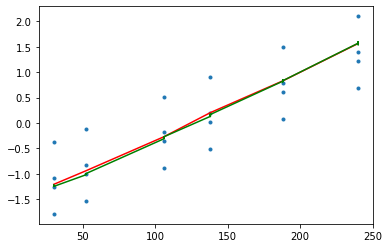

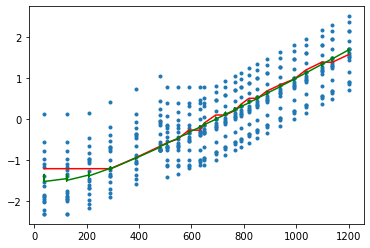

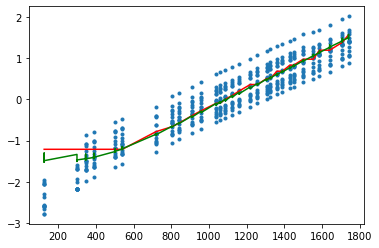

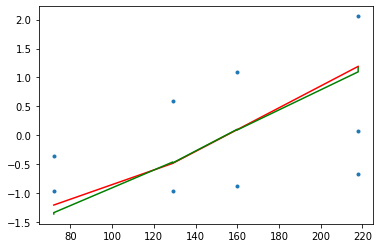

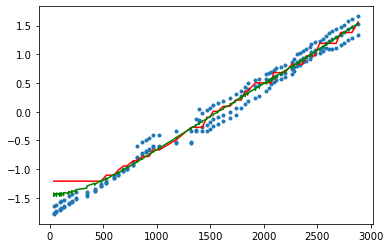

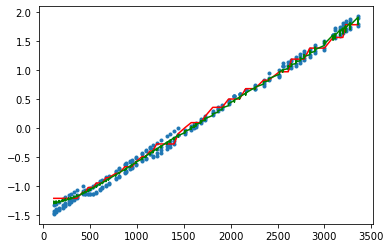

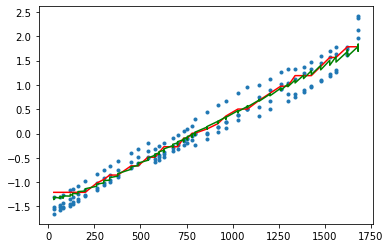

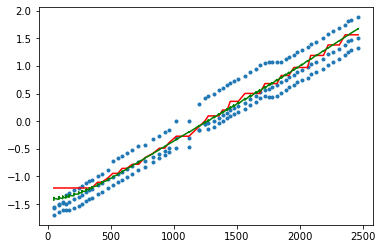

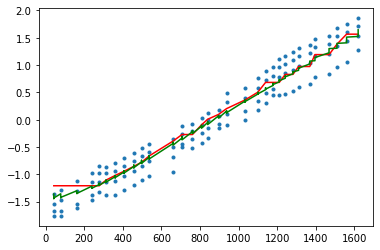

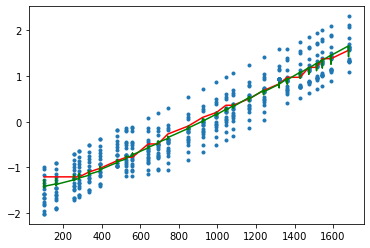

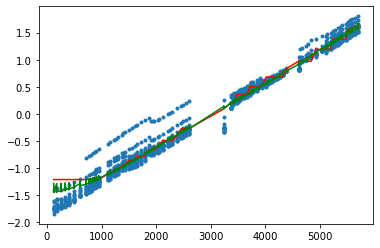

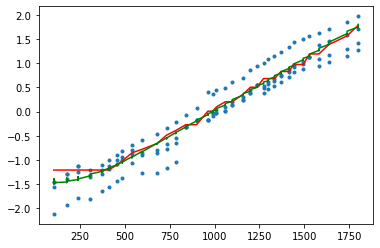

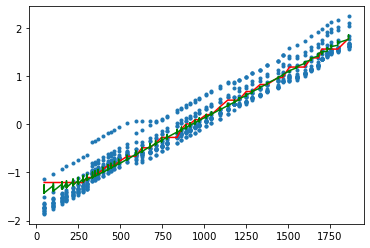

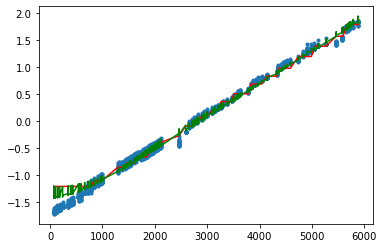

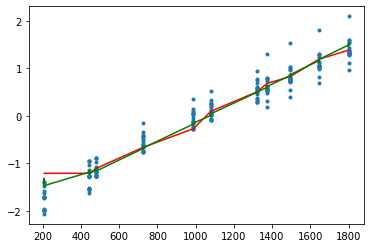

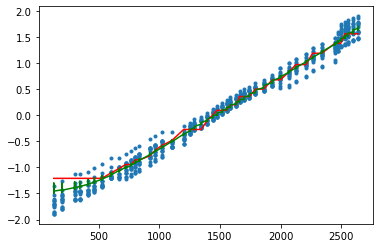

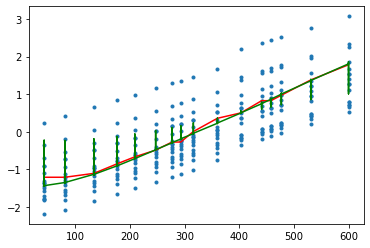

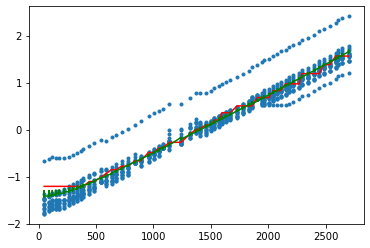

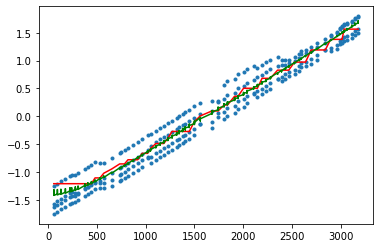

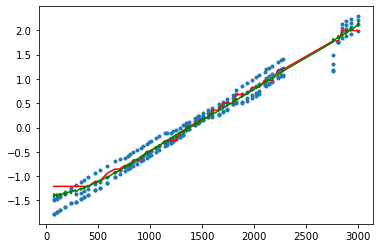

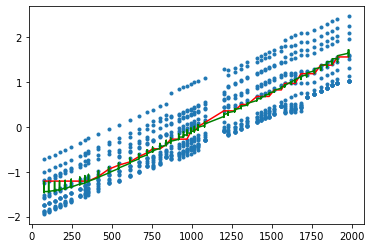

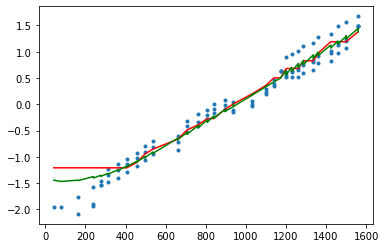

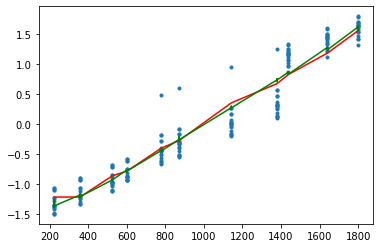

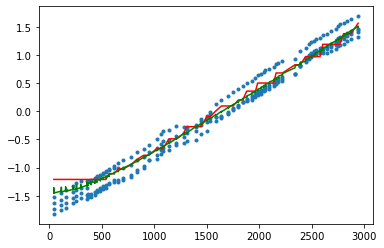

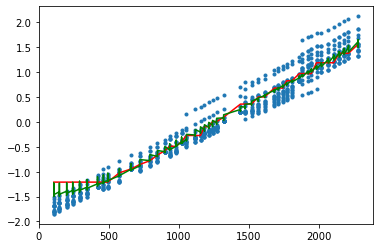

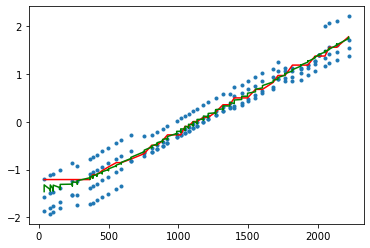

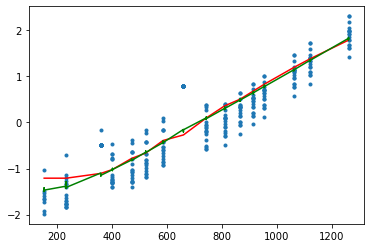

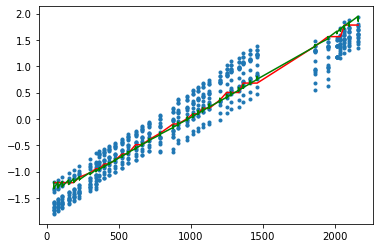

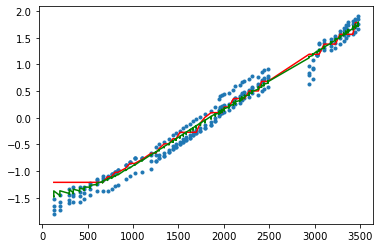

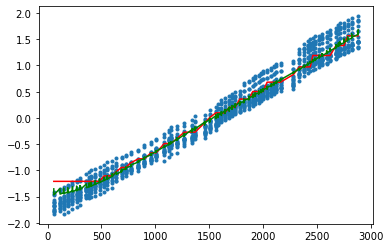

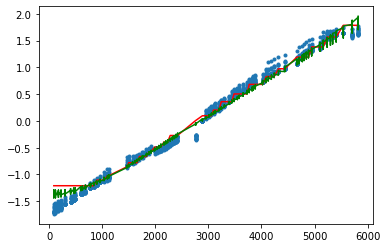

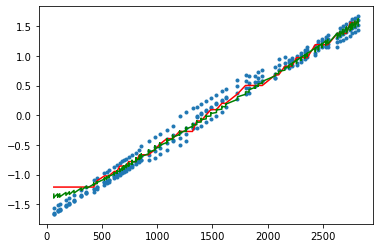

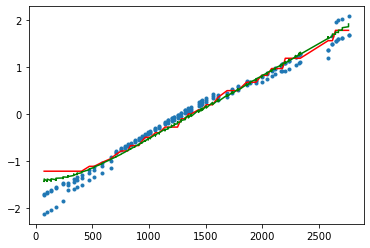

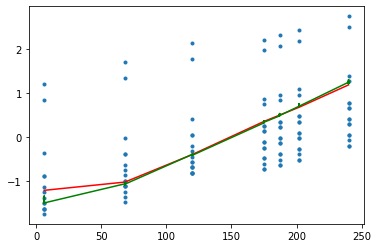

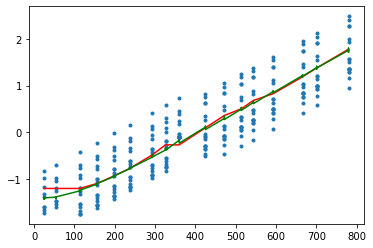

In [24]:
import random
trip_ids = df["trip_id"].unique()
for i in random.sample(range(len(trip_ids)), 20):
    cur_df = df.loc[(df['trip_id'] == trip_ids[i])].sort_values(["scheduled_departure_time", "real_departure_time"], ignore_index=True)
    X_disp = cur_df["scheduled_departure_time"]
    X = cur_df[["trip_id", "start_date",  "stop_sequence", "vehicle_id", "scheduled_departure_time"]]
    Y = cur_df["real_departure_time"].values.reshape(-1, 1)
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X = sc_X.fit_transform(X)
    Y = sc_y.fit_transform(Y)
    # We instead use the trained model based on the entire dataset
    # linear_regressor = LinearRegression()
    # linear_regressor.fit(X, Y)
    Y_pred_1 = regressor_1.predict(X)
    Y_pred_2 = regressor_2.predict(X)
    plt.figure(i)
    plt.scatter(X_disp, Y, marker=".")
    plt.plot(X_disp, Y_pred_1, color='red')
    plt.plot(X_disp, Y_pred_2, color='green')